In [10]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Hiezam & Aida/DataVis/Dataset2.csv')
df

,Date,Daily,Days since National holiday
0,24/1/2020,3,23
1,25/1/2020,3,0
2,26/1/2020,1,0
3,27/1/2020,0,1
4,28/1/2020,0,2
...,...,...,...
347,5/1/2021,2027,4
348,6/1/2021,2593,5
349,12/2/2021,3000,0
350,6/4/2021,5000,26


In [ ]:
future_days = 3

df = df[['Date','Daily']]
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# df = df[232:]
df['Predictions'] = df[['Daily']]
# .shift(-future_days)
df

,Daily,Days since National holiday,Predictions
0,3,23,3
1,3,0,3
2,1,0,1
3,0,1,0
4,0,2,0
...,...,...,...
347,2027,4,2027
348,2593,5,2593
349,3000,0,3000
350,5000,26,5000


In [ ]:
X = np.array(df.drop(['Predictions'],1))[:-future_days]
X

array([[   3,   23],
       [   3,    0],
       [   1,    0],
       [   0,    1],
       [   0,    2],
       [   3,    3],
       [   1,    4],
       [   0,    5],
       [   0,    6],
       [   0,    7],
       [   0,    8],
       [   2,    9],
       [   2,   10],
       [   0,   11],
       [   0,   12],
       [   4,   13],
       [   0,   14],
       [   2,   15],
       [   0,   16],
       [   0,   17],
       [   1,   18],
       [   0,   19],
       [   3,   20],
       [   0,   21],
       [   0,   22],
       [   0,   23],
       [   0,   24],
       [   0,   25],
       [   0,   26],
       [   0,   27],
       [   0,   28],
       [   0,   29],
       [   0,   30],
       [   0,   31],
       [   1,   32],
       [   0,   33],
       [   2,   34],
       [   4,   35],
       [   0,   36],
       [   7,   37],
       [  14,   38],
       [   0,   39],
       [  33,   40],
       [  10,   41],
       [   6,   42],
       [  18,   43],
       [  12,   44],
       [  20,

In [ ]:
y = np.array(df['Predictions']).reshape(-1,1)[:-future_days]
y

array([[   3],
       [   3],
       [   1],
       [   0],
       [   0],
       [   3],
       [   1],
       [   0],
       [   0],
       [   0],
       [   0],
       [   2],
       [   2],
       [   0],
       [   0],
       [   4],
       [   0],
       [   2],
       [   0],
       [   0],
       [   1],
       [   0],
       [   3],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   1],
       [   0],
       [   2],
       [   4],
       [   0],
       [   7],
       [  14],
       [   0],
       [  33],
       [  10],
       [   6],
       [  18],
       [  12],
       [  20],
       [   0],
       [  48],
       [  41],
       [ 190],
       [ 138],
       [ 107],
       [ 117],
       [ 110],
       [ 130],
       [ 153],
       [ 123],
       [ 212],
       [ 106],
       [ 172],
       [ 235],
       [ 130],
       [ 159],
       [ 150],
       [ 1

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
x_future = df.drop(["Predictions"], 1)#[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future 

array([[3000,    0],
       [5000,   26],
       [8000,    2]])

In [ ]:
rf_prediction = rf.predict(x_test)
print(rf_prediction)
print()

[5.71900e+01 7.50000e-01 8.38260e+02 1.51480e+02 0.00000e+00 4.55500e+01
 0.00000e+00 1.09150e+02 0.00000e+00 8.68850e+02 1.09250e+02 5.00500e+01
 4.80700e+01 1.40100e+01 7.20000e-01 8.33500e+01 1.60300e+01 8.42090e+02
 8.20780e+02 0.00000e+00 8.52190e+02 8.09900e+01 1.04300e+02 3.70600e+01
 9.99000e+00 5.74010e+02 1.22310e+03 2.49600e+02 7.99000e+00 1.70623e+03
 7.20000e-01 0.00000e+00 9.29400e+01 6.00000e+00 0.00000e+00 6.85300e+01
 1.38760e+02 1.21630e+03 2.03846e+03 1.39900e+01 9.99000e+00 5.70600e+01
 7.20000e-01 1.51660e+02 1.52000e+02 5.99000e+00 6.99000e+00 1.85500e+01
 0.00000e+00 0.00000e+00 3.03500e+01 1.32741e+03 0.00000e+00 3.88000e+00
 5.00000e+00 1.71240e+02 3.02000e+00 3.84000e+00 1.33113e+03 0.00000e+00
 1.49530e+02 1.09800e+01 1.61549e+03 2.94120e+02 1.22310e+03 1.12091e+03
 6.51420e+02 0.00000e+00 0.00000e+00 1.01740e+02]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


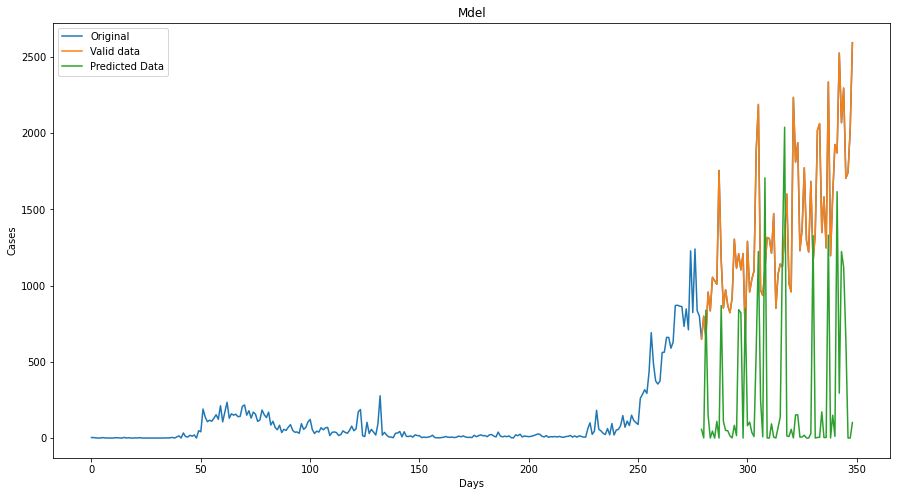

In [ ]:
predictions = rf_prediction
valid = df[x_train.shape[0]:-future_days]
valid['Predictions'] = predictions
plt.figure(figsize=(15,8))
plt.title('Mdel')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.plot(df['Daily'][:-future_days])
plt.plot(valid[['Daily', 'Predictions']])
plt.legend(['Original', 'Valid data', 'Predicted Data'])
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y)
scores

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

array([ 0.99937797,  0.99629578,  0.99607003,  0.98377919, -0.05115231])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-2.12 accuracy with a standard deviation of 0.88


In [ ]:
scores.mean()

-2.1231462183135834

In [ ]:
X_2021 = np.array([2700, 3400, 4800, 6000, 8000]).reshape(-1,1)

In [ ]:
rf_prediction = rf.predict(X_2021)
print(rf_prediction)
print()

[1430.69 1430.69 1430.69 1430.69 1430.69]



New

In [24]:
# Read data
data = pd.read_csv('/content/Dataset2.csv')

In [25]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [26]:
data = data[['Date', 'Daily']]
df = data[:-3]
future = data[-3:]

In [27]:
train_len = math.ceil(len(df)*0.8)
train = df[:train_len]
test = df[train_len:]

In [28]:
X_train = train['Date'].values.reshape(-1,1)
y_train = train['Daily'].values.reshape(-1,1)

X_test = test['Date'].values.reshape(-1,1)
y_test = test['Daily'].values.reshape(-1,1)

In [29]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
rf_prediction = rf.predict(X_test)
print(rf_prediction)
print()

[914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48
 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48
 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48
 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48
 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48
 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48
 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48 914.48
 914.48 914.48]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


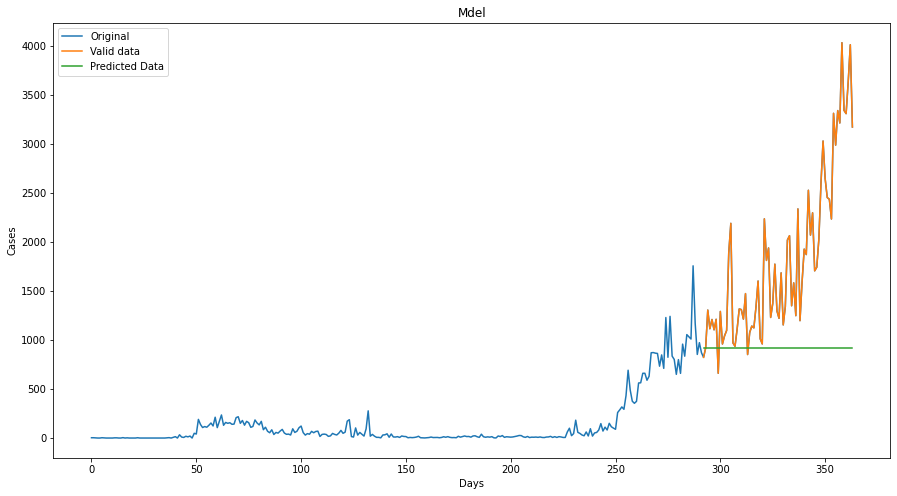

In [34]:
predictions = rf_prediction
valid = df[X_train.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(15,8))
plt.title('Mdel')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.plot(df['Daily'])
plt.plot(valid[['Daily', 'Predictions']])
plt.legend(['Original', 'Valid data', 'Predicted Data'])
plt.show()